# <center>Lab 2 - Probability and Statistics<center>
---
Student Name: **Devarsh Sandip Shah** <br>
Student ID: **8917026**

## Part A

In [50]:
# Installing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

In [51]:
# Loading lab_2_dataset.csv
lab2_datasets = pd.read_csv("D:/conestoga-aiml/Semester1/AiAlgorithms/Fall2023/students-submissions/8917026/lab2/Lab2_dataset.csv")

In [52]:
lab2_datasets.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


# Pre-processing

In [53]:
# Pre-Processing the data
count_Vectorizer = CountVectorizer(max_features = 5000)
X_train_vector = count_Vectorizer.fit_transform(lab2_datasets['text'])

# Using to.array() to convert the sparsed matrix into dense numpy array
X_train_vectorized = X_train_vector.toarray()

# Data Splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_train_vectorized, lab2_datasets['label_num'], test_size = 0.2)

# Model Training and Evaluation

- **_Train using Sklearn SVC model on the training dataset and evaluate on the test set_**

In [54]:
# Training the model using SVC(Support Vector Classifier)
svc_model = SVC()
svc_model.fit(X_train, Y_train)

# Evaluating the model
svc_model_evaluate = svc_model.predict(X_test)
svc_model_confusion_matrix = accuracy_score(Y_test, svc_model_evaluate)

print(f'Accuracy Score of SVC model: {svc_model_confusion_matrix * 100:.2f}%')

Accuracy Score of SVC model: 96.14%


**_Train and evaluate also on the Gaussian and Multinomial Naiive Bayes Classifiers_**

- Gaussian Naiive Bayes Classifier

In [55]:
# Training model by Gaussian Naiive Bayes Classifier 
model_GNB = GaussianNB()
model_GNB.fit(X_train, Y_train)

# Evaluating the model 
model_GNB_evaluate = model_GNB.predict(X_test)
gnb_model_confusion_matrix = accuracy_score(Y_test, model_GNB_evaluate)

print(f'Accuracy Score of Gaussian Naiive Bayes Classifier : {gnb_model_confusion_matrix *100 :.2f}%')

Accuracy Score of Gaussian Naiive Bayes Classifier : 96.62%


- Multinomial Naiive Bayes Classifier 

In [56]:
# Training model by Multinominal Naiive Bayes Classifier 
model_MNB = MultinomialNB()
model_MNB.fit(X_train, Y_train)

# Evaluating the model
model_MNB_evaluate = model_MNB.predict(X_test)
model_MNB_confusion_matrix = accuracy_score(Y_test, model_MNB_evaluate)

print(f'Accuracy Score of Multinominal Naiive Bayes Classifier  : {model_MNB_confusion_matrix *100 :.2f}%')

Accuracy Score of Multinominal Naiive Bayes Classifier  : 95.75%


# Compare between the performance of all models and comment on the reasons behind the differences seen between the three models.

- After training all models it seems like SVC model is slower than other two models and have less accurary than Gaussian Naiive Bayes Classifier.

- I also tried to limit the max_feature() to limit the data and I got the accurate result for all the models, but the Gaussian and Multinomial Naiive Bayes Classifier are faster compared to SVC.

- After looking at the result: Gaussian Naiive Bayes Classifiers performed much better.

## Part B

In [57]:
# Loading AB_NYC_2019.csv data:
AB_NYC_data = pd.read_csv("D:/conestoga-aiml/Semester1/AiAlgorithms/Fall2023/students-submissions/8917026/lab2/AB_NYC_2019.csv")

In [58]:
AB_NYC_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- **_Remove outliers based on price per night for a given apartment/home._**

- **_Compare the Z-score approach and the whiskers approach in terms of who is better to remove the outliers in this case._**

In [59]:
## Z-Score Approach
# All attributes for Z-score: 

price_data = AB_NYC_data["price"]
mean_price_data = np.mean(price_data)
sd_price_data = np.std(price_data)

# Calculating Z-score
z_score = (price_data - mean_price_data) / sd_price_data

# Removing outliers using default threshold value
AB_NYC_outliers_removed = AB_NYC_data[z_score < 3]

print("Rows of data in original data :", len(z_score))
print("Rows of data in original data after removing outliers:", len(AB_NYC_outliers_removed))


Rows of data in original data : 48895
Rows of data in original data after removing outliers: 48507


In [60]:
# Whiskers approach

# Calculating the quartiles
Q1 = AB_NYC_data['price'].quantile(0.25)
Q3 = AB_NYC_data['price'].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# Calculating the whiskers
left_whiskers = Q1 - 1.5 * IQR
right_whiskers = Q3 + 1.5 * IQR

whiskers = AB_NYC_data[(AB_NYC_data['price'] >= left_whiskers) & (AB_NYC_data['price'] <= right_whiskers)]

print("Rows within whiskers :", len(whiskers))

Rows within whiskers : 45923


- Let's see why this much difference using distribution plotting:

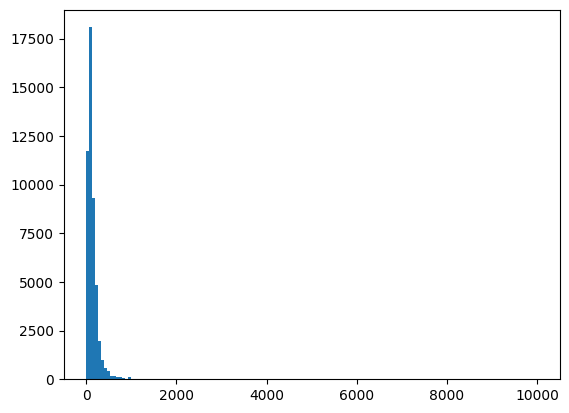

In [61]:
plt.hist(AB_NYC_data['price'], bins= 150)
plt.show()

- When we examine the 'price' data distribution, it becomes clear that it leans heavily towards higher values with a sharp peak, indicating a right-skewed pattern. This results in the box-whisker approach being quite strict in identifying outliers, as the Interquartile Range (IQR) is relatively small. In practice, the box-whisker method, which classifies only around 3,000 data points as outliers out of a total of about 49,000, appears to be the better choice. It's like being cautious but not overly so, as we still have a substantial amount of data left for further analysis and modeling. 
- Therefore, the box-whisker approach strikes a good balance between outlier removal and retaining valuable data in this context.